# 1. GCN embeddings

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (27/03/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Networkx
- Numpy (tested on v1.22.1)

In [27]:
import matplotlib.pyplot as plt
from networkx import karate_club_graph, to_numpy_matrix
import numpy as np

## 1. Identity propagation

In [28]:
# Adjacency matrix
A = np.matrix([
    [0, 1, 1, 0],
    [1, 0, 1, 1], 
    [1, 1, 0, 0],
    [0, 1, 0, 0]],
    dtype=float)
print("A:\n", A)

A:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [29]:
# Feature matrix
X = np.matrix([[i+1, -i-1] for i in range(A.shape[0])])
print("X:\n", X)

X:
 [[ 1 -1]
 [ 2 -2]
 [ 3 -3]
 [ 4 -4]]


In [30]:
# Identity function as activation
def f_identity(X):
    return X

In [31]:
# Propagation rule
H_next = f_identity(A*X)
print("H_next:\n", H_next)

H_next:
 [[ 5. -5.]
 [ 8. -8.]
 [ 3. -3.]
 [ 2. -2.]]


## Adding self-loop features

In [32]:
# Identity matrix
I = np.matrix(np.eye(A.shape[0]))
print("I:\n", I)

I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [33]:
# Define A_hat as A + I
A_hat = A + I
print("A:\n", A)
print("\n")
print("A_hat:\n", A_hat)

A:
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


A_hat:
 [[1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]]


In [34]:
# Propagation rule
H_next2 = f_identity(A_hat*X)
print("H_next:\n", H_next)
print("\n")
print("H_next2:\n", H_next2)

H_next:
 [[ 5. -5.]
 [ 8. -8.]
 [ 3. -3.]
 [ 2. -2.]]


H_next2:
 [[  6.  -6.]
 [ 10. -10.]
 [  6.  -6.]
 [  6.  -6.]]


## Enhancing the propagation rule #1: normalizing features

In [35]:
# Define the degree matrix
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
print("D:\n", D)

D:
 [[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


In [36]:
# Invert degree matrix
D_inv = D**-1
print("D_inv:\n", D_inv)

D_inv:
 [[0.5        0.         0.         0.        ]
 [0.         0.33333333 0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         1.        ]]


In [37]:
# Nomalization at a glance
N = D_inv*A
print("N:\n", N)

N:
 [[0.         0.5        0.5        0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.5        0.5        0.         0.        ]
 [0.         1.         0.         0.        ]]


In [38]:
# Update propagation rule
H_next3 = f_identity(N*X)
print("H_next3:\n", H_next3)

H_next3:
 [[ 2.5        -2.5       ]
 [ 2.66666667 -2.66666667]
 [ 1.5        -1.5       ]
 [ 2.         -2.        ]]


## Enhancing the propagation rule #2: adding weights

In [39]:
# Weight matrix
W = np.matrix([[1, -1],[-1, 1]])
print("W:\n", W)

W:
 [[ 1 -1]
 [-1  1]]


In [40]:
# Define D_hat as the degree matrix of A_hat
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
print("D_hat:\n", D_hat)

D_hat:
 [[3. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]


In [41]:
# Define N_hat (normalization)
N_hat = (D_hat**-1)*A_hat
print("N_hat:\n", N_hat)

N_hat:
 [[0.33333333 0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]]


In [42]:
# Propagation rule
H_next4 = f_identity(N_hat*X)
print("H_next4:\n", H_next4)

H_next4:
 [[ 2.  -2. ]
 [ 2.5 -2.5]
 [ 2.  -2. ]
 [ 3.  -3. ]]


In [43]:
# Propagation rule
H_next4 = f_identity(N_hat*X*W)
print("H_next4:\n", H_next4)

H_next4:
 [[ 4. -4.]
 [ 5. -5.]
 [ 4. -4.]
 [ 6. -6.]]


## Enhancing the propagation rule #3: adding a proper activation function

In [44]:
# ReLU as activation function
def f_relu(X):
    # ReLU(X) = max(X, 0) implemented using fancy indexing
    X[X<0] = 0
    return X

In [45]:
# Propagation rule
H_next5 = f_relu(N_hat*X*W)
print("H_next5:\n", H_next5)

H_next5:
 [[4. 0.]
 [5. 0.]
 [4. 0.]
 [6. 0.]]


## Enhancing the propagation rule #4: Kipf propagation rule

In [46]:
# Half invert of a diagonal matrix
def half_invert(X):
    # Half inversion of a diagonal matrix
    for i in range(X.shape[0]):
        X[i,i] = X[i,i]**(-1/2)
    return X

In [47]:
# Half invert of degree matrix D_hat
D_halfinv = half_invert(D_hat)
print("D_halfinv:\n", D_halfinv)

D_halfinv:
 [[0.57735027 0.         0.         0.        ]
 [0.         0.5        0.         0.        ]
 [0.         0.         0.57735027 0.        ]
 [0.         0.         0.         0.70710678]]


In [48]:
# Kipf normalization (a.k.a. symmetric normalization)
N_kipf = D_halfinv*A_hat*D_halfinv
print("N_kipf:\n", N_kipf)

N_kipf:
 [[0.33333333 0.28867513 0.33333333 0.        ]
 [0.28867513 0.25       0.28867513 0.35355339]
 [0.33333333 0.28867513 0.33333333 0.        ]
 [0.         0.35355339 0.         0.5       ]]


In [49]:
# Compare conventional normalization and Kipf
print("N_hat:\n", N_hat)
print("\n")
print("N_kipf:\n", N_kipf)

N_hat:
 [[0.33333333 0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]]


N_kipf:
 [[0.33333333 0.28867513 0.33333333 0.        ]
 [0.28867513 0.25       0.28867513 0.35355339]
 [0.33333333 0.28867513 0.33333333 0.        ]
 [0.         0.35355339 0.         0.5       ]]


In [50]:
# Propagation rule
H_next6 = f_relu(N_kipf*X*W)
print("H_next6:\n", H_next6)

H_next6:
 [[3.82136721 0.        ]
 [6.1378282  0.        ]
 [3.82136721 0.        ]
 [5.41421356 0.        ]]


## Applying these ideas to a graph dataset

In [65]:
# Fix numpy seed for reproducibility
seed_number = 28
#seed_number = 14
np.random.seed(seed_number)

In [66]:
# Import Zachary's karate club dataset
zkc = karate_club_graph()

In [67]:
# Check what is in zkc
print(zkc.__dict__)

{'graph_attr_dict_factory': <class 'dict'>, 'node_dict_factory': <class 'dict'>, 'node_attr_dict_factory': <class 'dict'>, 'adjlist_outer_dict_factory': <class 'dict'>, 'adjlist_inner_dict_factory': <class 'dict'>, 'edge_attr_dict_factory': <class 'dict'>, 'graph': {'name': "Zachary's Karate Club"}, '_node': {0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Of

In [68]:
nodes_index_list = []
for node_key, node_value in zkc._node.items():
    print("Node index: {}, node labels: {}".format(node_key, node_value))
    nodes_index_list.append(node_key)

Node index: 0, node labels: {'club': 'Mr. Hi'}
Node index: 1, node labels: {'club': 'Mr. Hi'}
Node index: 2, node labels: {'club': 'Mr. Hi'}
Node index: 3, node labels: {'club': 'Mr. Hi'}
Node index: 4, node labels: {'club': 'Mr. Hi'}
Node index: 5, node labels: {'club': 'Mr. Hi'}
Node index: 6, node labels: {'club': 'Mr. Hi'}
Node index: 7, node labels: {'club': 'Mr. Hi'}
Node index: 8, node labels: {'club': 'Mr. Hi'}
Node index: 9, node labels: {'club': 'Officer'}
Node index: 10, node labels: {'club': 'Mr. Hi'}
Node index: 11, node labels: {'club': 'Mr. Hi'}
Node index: 12, node labels: {'club': 'Mr. Hi'}
Node index: 13, node labels: {'club': 'Mr. Hi'}
Node index: 14, node labels: {'club': 'Officer'}
Node index: 15, node labels: {'club': 'Officer'}
Node index: 16, node labels: {'club': 'Mr. Hi'}
Node index: 17, node labels: {'club': 'Mr. Hi'}
Node index: 18, node labels: {'club': 'Officer'}
Node index: 19, node labels: {'club': 'Mr. Hi'}
Node index: 20, node labels: {'club': 'Officer

In [69]:
# Retrieve node labels
nodes_labels = [node_value['club'] for node_value in zkc._node.values()]
print("nodes_labels:\n", nodes_labels)

nodes_labels:
 ['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']


In [70]:
# Retrieve node labels (binary representation)
nodes_labels_binary = [int(node_value['club'] == 'Mr. Hi') for node_value in zkc._node.values()]
print("nodes_labels_binary:\n", nodes_labels_binary)

nodes_labels_binary:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [71]:
print("nodes_index_list: ", nodes_index_list)
number_of_nodes = len(nodes_index_list)
print("number_of_nodes: ", number_of_nodes)

nodes_index_list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
number_of_nodes:  34


In [72]:
# Retrieve adjacency matrix
A = to_numpy_matrix(zkc, nodelist = nodes_index_list)
print("A:\n", A)

A:
 [[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [73]:
# Reconstruct A_hat
I = np.eye(number_of_nodes)
A_hat = A + I
print("A_hat:\n", A_hat)

A_hat:
 [[1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [74]:
# Reconstruct D_hat
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
print("D_hat:\n", D_hat)

D_hat:
 [[17.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 18.]]


In [75]:
# Graph features matrix (no features here, so let us use an identity matrix instead)
X = np.eye(number_of_nodes)
print("X:\n", X)

X:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [83]:
# Initialize weights for two layers, using Normal(0,1) random variables
W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
print("W1:\n", W1)
print("\n")
print("W2:\n", W2)

W1:
 [[ 2.24077311e+00 -1.01569370e-01 -8.25137102e-01  1.27232790e-01]
 [-2.26333756e+00  4.42790710e-01 -8.83892467e-01 -1.40449877e+00]
 [ 2.70534657e-01 -1.37669190e-01  1.17432207e+00 -7.89184265e-01]
 [ 5.38711436e-01 -2.86587084e-01 -1.12787001e+00  1.23394418e+00]
 [-2.89666516e-02 -7.11505074e-01  1.18011230e+00 -7.61644482e-01]
 [ 1.26207943e+00 -4.71803572e-01 -1.32969026e+00  1.39339624e+00]
 [ 1.02852780e+00  1.55893133e+00  1.85206799e-02 -1.55776231e+00]
 [-8.17371846e-01 -1.51413885e-02 -1.41731594e-01 -1.00642128e+00]
 [ 8.75559470e-02 -1.28643519e+00  1.30016957e-01  3.44131717e-01]
 [-3.64541021e-01 -5.72937137e-01  5.91192308e-01 -6.45087839e-01]
 [-4.59512224e-01 -3.26089375e-01 -5.89430128e-03  5.98496574e-01]
 [ 1.35506468e-03 -4.03241117e-02  1.11524260e+00 -9.95567374e-01]
 [ 2.42293274e-01 -1.52303190e-01  2.58147547e-01 -1.91011154e+00]
 [ 1.51609464e-01 -5.34764589e-01 -1.17314567e+00  6.26092086e-02]
 [ 9.91235917e-01 -9.81045534e-01 -1.42720775e+00  1.4564

In [84]:
# Propagation rule as a function (normalized ReLU)
def gcn_normalized_layer(A_hat, D_hat, X, W):
    return f_relu((D_hat**-1)*A_hat*X*W)

In [85]:
# Compute output for GCN normalized layer 1
H_layer1 = gcn_normalized_layer(A_hat, D_hat, X, W1)
# Compute output for GCN normalized layer 2
H_layer2 = gcn_normalized_layer(A_hat, D_hat, H_layer1, W2)
print("H_layer1:\n", H_layer1)
print("H_layer2:\n", H_layer2)

H_layer1:
 [[0.05259408 0.         0.         0.        ]
 [0.13771207 0.07058551 0.         0.        ]
 [0.29471281 0.         0.         0.        ]
 [0.05188751 0.         0.         0.        ]
 [0.69520551 0.10494188 0.0919004  0.        ]
 [1.14534306 0.11835371 0.         0.        ]
 [1.23145217 0.04127057 0.0783364  0.        ]
 [0.         0.         0.         0.        ]
 [0.84436402 0.         0.         0.        ]
 [0.07158945 0.         0.10759698 0.        ]
 [0.75359342 0.         0.         0.33937028]
 [1.12106409 0.         0.14505275 0.        ]
 [1.00725927 0.         0.         0.        ]
 [0.20784431 0.         0.         0.        ]
 [1.0680052  0.         0.         0.        ]
 [0.62364352 0.         0.         0.        ]
 [1.31515147 0.33980909 0.01223559 0.        ]
 [0.31806795 0.7690128  0.         0.        ]
 [0.55021748 0.         0.         0.        ]
 [0.07579398 0.18865378 0.         0.        ]
 [0.35197879 0.         0.         0.        ]
 [

In [86]:
nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
print(nodes_embeddings)

{0: array([0.        , 0.14310183]), 1: array([0.00641287, 0.        ]), 2: array([0.        , 0.05829509]), 3: array([0.        , 0.08883102]), 4: array([0.       , 0.3069777]), 5: array([0.        , 0.32749871]), 6: array([0.        , 0.24629995]), 7: array([0.        , 0.03042639]), 8: array([0.        , 0.08511704]), 9: array([0.        , 0.05436001]), 10: array([0.        , 0.28463125]), 11: array([0.        , 0.22275669]), 12: array([0.        , 0.14324381]), 13: array([0.        , 0.04333473]), 14: array([0.        , 0.14678745]), 15: array([0.        , 0.08953305]), 16: array([0.        , 0.34332688]), 17: array([0.2088691, 0.       ]), 18: array([0.        , 0.08007237]), 19: array([0.00959835, 0.        ]), 20: array([0.        , 0.05453003]), 21: array([0.        , 0.00605244]), 22: array([0.10372103, 0.        ]), 23: array([0.        , 0.09629597]), 24: array([0.        , 0.13199204]), 25: array([0.        , 0.13605404]), 26: array([0.        , 0.07009894]), 27: array([0. 

In [87]:
# Display our embeddings
def display_after_embedding(nodes_embeddings, nodes_labels_binary):
    plt.figure(figsize = (7, 5))
    for node_key, node_value in nodes_embeddings.items():
        label_bool = nodes_labels_binary[node_key]
        marker_node = '+' if label_bool else 'o'
        color_node = 'b' if label_bool else 'r'
        plt.scatter(node_value[0], node_value[1], color = color_node, marker = marker_node)
    plt.plot()
    plt.show()

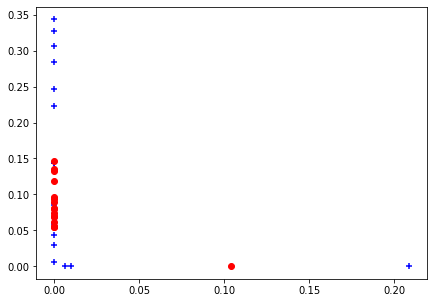

In [88]:
display_after_embedding(nodes_embeddings, nodes_labels_binary)

## Applying these ideas to a graph dataset - Kipf normalization

In [ ]:
# Fix numpy seed for reproducibility
seed_number = 121
np.random.seed(seed_number)

In [ ]:
# Initialize weights for two layers, using Normal(0,1) random variables
W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
print("W1:\n", W1)
print("\n")
print("W2:\n", W2)

In [ ]:
# Propagation rule as a function (Kipf ReLU)
def gcn_kipf_layer(A_hat, D_hat, X, W):
    D_halfinv = half_invert(D_hat)
    return f_relu(D_halfinv*A_hat*D_halfinv*X*W)

In [ ]:
# Compute output for GCN Kipf layer 1
H_layer1 = gcn_kipf_layer(A_hat, D_hat, X, W1)
# Compute output for GCN Kipf layer 2
H_layer2 = gcn_kipf_layer(A_hat, D_hat, H_layer1, W2)
print("H_layer1:\n", H_layer1)
print("H_layer2:\n", H_layer2)

In [ ]:
nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
print(nodes_embeddings)

In [ ]:
# Display our embeddings
display_after_embedding(nodes_embeddings, nodes_labels_binary)

## Draft: seed finder for appropriate representations

In [ ]:
for seed_number in range(1, 90):
    np.random.seed(seed_number)
    print("---")
    print("seed_number: ", seed_number)
    W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
    W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
    H_layer1 = gcn_normalized_layer(A_hat, D_hat, X, W1)
    H_layer2 = gcn_normalized_layer(A_hat, D_hat, H_layer1, W2)
    nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
    display_after_embedding(nodes_embeddings, nodes_labels_binary)

In [ ]:
for seed_number in range(91, 190):
    np.random.seed(seed_number)
    print("---")
    print("seed_number: ", seed_number)
    W1 = np.random.normal(loc = 0, scale = 1, size = (number_of_nodes, 4))
    W2 = np.random.normal(loc = 0, size = (W1.shape[1], 2))
    H_layer1 = gcn_kipf_layer(A_hat, D_hat, X, W1)
    H_layer2 = gcn_kipf_layer(A_hat, D_hat, H_layer1, W2)
    nodes_embeddings = {node: np.array(H_layer2)[node] for node in zkc.nodes()}
    display_after_embedding(nodes_embeddings, nodes_labels_binary)